## Financial Data Exploration
In this notebook we shall explore Kaggle 200+ Financial Features data set. This can help us learn more about financial information and maybe even about data science as well.

We shall consider three questions in this analysis, and discuss here, ahead of the analysis, what they will require.

## The CRISP-DM Process
Throughout this notebook we are looking to follow the Cross-Industry Standard Process for Data Mining:
- Business Understanding
- Data Understanding
- Prepare Data
- Data Modelling
- Evaluate the Results

The first four of these are in this notebook. Discussion on the last step is found more in depth in the Medium blog post: https://medium.com/@tombutler11044/us-stocks-in-2018-back-when-it-wasnt-all-crashing-b710f79505cc


## Business Understanding: Questions
1. Which sectors and companies displayed the greate percentage growth in 2019?
2. Does growth in technology company R&D spending correspond to a growth in share price?
3. Where do the best and worst performing sectors differ the most?

Information about the data:
https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018


## 1. Load in the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('Documents/Datasets/200-financial-indicators-of-us-stocks-20142018/2018_Financial_Data.csv')

In [3]:
# reset the index of the data to be the company
df['Company'] = df['Unnamed: 0']
df.drop(labels='Unnamed: 0', inplace=True, axis=1)
df.set_index(keys='Company', inplace=True)

## 1.1 Data Understanding: Clarifying some useful information about the data
It will be useful to know what sort of data we are dealing with, i.e., how many of these variables are categorical and how many are numerical? This is an easy feature of the data to find out.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, CMCSA to ZYME
Columns: 224 entries, Revenue to Class
dtypes: float64(222), int64(1), object(1)
memory usage: 7.5+ MB


The only two categorical columns (at least recognised as not numeric) are the index of the data and the sector of the company. This means, if we decide to run a machine learning algorithm on the data, we should not have to add many dummy variables at all.

Now we know that we have:
- 222 numerical features: these shall be the financial indicators.
- 1 int: this is the binary classification of whether to buy the stock or not
- 1 object: this is a categorical variable, `SECTOR`

In [5]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


## 1.2 Quick Data Exploration
Knowing that we have only two categorical variables (`Class` and `SECTOR`) we can explore how the data is dstributed between these variables. We can use a simple `countplot` from the seaborn library to visualise these.

### How many companies were BUY vs. NOT BUY?

In [6]:
df['Class'].value_counts()

1    3046
0    1346
Name: Class, dtype: int64

Text(0.5, 1.0, 'Class Counts')

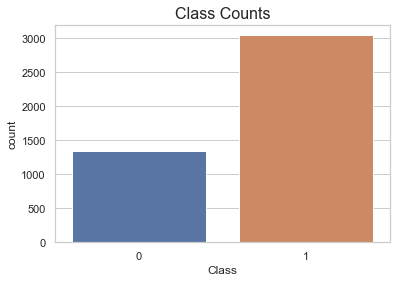

In [7]:
sns.countplot(x=df['Class'])
plt.title('Class Counts', fontsize=16)

### How are the companies distributed across different sectors?

Text(0.5, 1.0, 'Sector Counts')

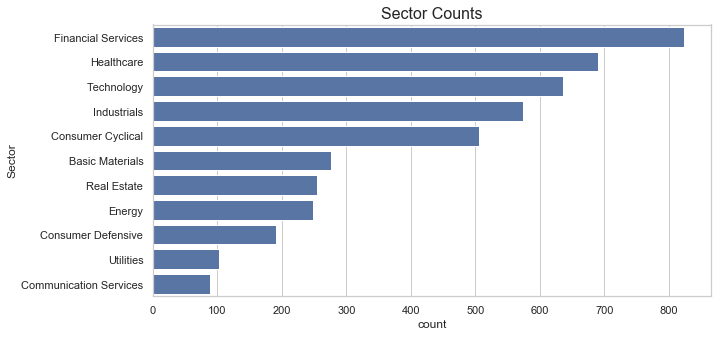

In [8]:
# makes the figure the size I want
fig, ax = plt.subplots(figsize=(10,5))

# see how many companies fall under each sector: can see how the data is distributed
sns.countplot(y=df['Sector'], color='b', orient='h', order = df['Sector'].value_counts().index)
plt.title('Sector Counts', fontsize=16)

### Companies across sectors broken down by BUY or NOT BUY

Text(0.5, 1.0, 'Sector Counts')

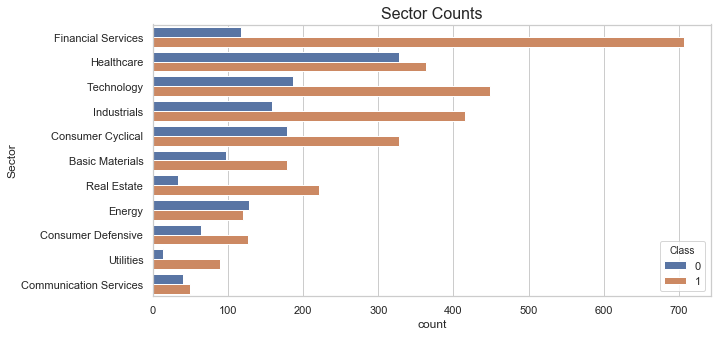

In [9]:
# makes the figure the size I want
fig, ax = plt.subplots(figsize=(10,5))

# Add in a hue of whether the stock is a BUY (1) or NOT BUY (0)
sns.countplot(y=df['Sector'], orient='h', order = df['Sector'].value_counts().index, hue=df['Class'])
plt.title('Sector Counts', fontsize=16)

What can we gather from these graphs? A couple of key points:
- The data, as split by class, are inbalanced. Over 3,000 of the companies have been classed as **BUY**, compared to under 1,500 **NOT BUY** classifications. This will be important to keep in mind during the splitting of the data for a machine learning exercise.
- There are 11 sectors with the top five having a volume of at least 500. The remaining six have volumes of under 300 each.

---

## 2. Data Preparation: Cleaning the data
There are several potential issues with the data we want to clarify first before we try and draw any conclusions from it:
- we need to explore any missing values in the data set, and
- we need to assess if the data makes sense, i.e., there are not any erroneous values that could skew results.

## 2.1 Dealing with the missing values
A neat way to visualise how many missing values exist in the dataset is to use a heatmap. We can see very clearly with the yellow vs. purple colour scheme that we have plenty of missing values we need to deal with.

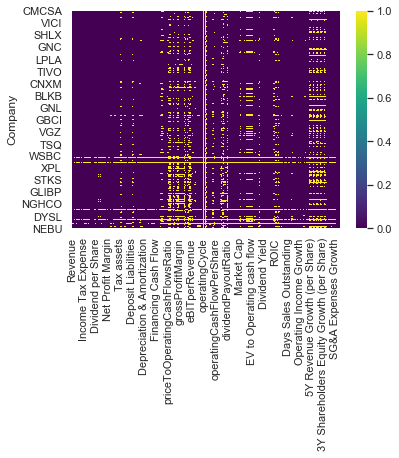

In [10]:
# initial heatmap of where the missing values are (yellow=missing)
sns.heatmap(df.isna(), cmap='viridis')

We want to fill in these missing values. Rather than simply replacing them with zero, we can impute their value with the mean for that column. Or, if we want to go one step further (as we shall), we can impute each missing value with the mean for their sector.

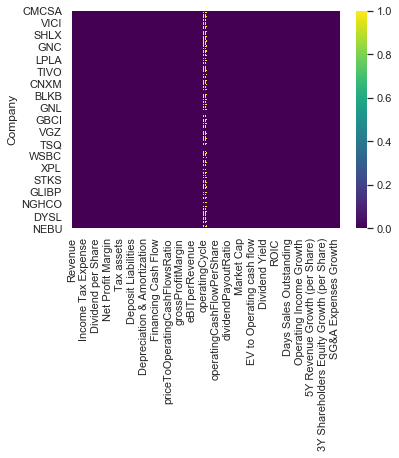

In [11]:
for col in df.select_dtypes(exclude=["object","int"]).columns:
    df[col] = df.groupby('Sector')[col].transform(lambda grp: grp.fillna(np.mean(grp)))

sns.heatmap(df.isnull(), cmap='viridis')

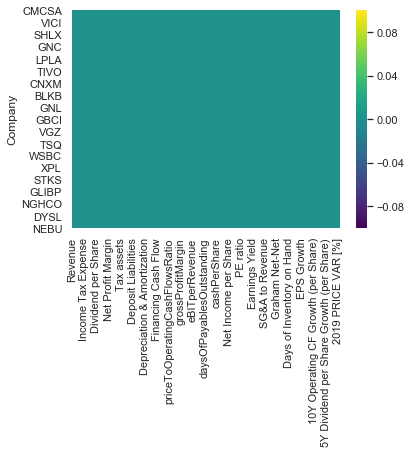

In [12]:
cols = []

for col in df.columns:
    if df[df[col].isnull()==True].shape[0] != 0:
        cols.append(col)
        
# these are the columns with the null values that we can see in the heatmap. Drop these columns
df.drop(labels=cols, inplace=True, axis=1)
sns.heatmap(df.isnull(), cmap='viridis')

There are no null values left in the data!

---

## Data Modelling / Answering our Business Questions

## Question 1: Best performing sectors and companies
Let's have a look at the target variable, the `PRICE VAR [%]`, and how it varies across the sectors.

In [13]:
# get the mean values by sector into a dataframe for use
sector_means = df.groupby('Sector').mean()

Text(0.5, 1.0, 'Mean 2019 Price Growth by Sector')

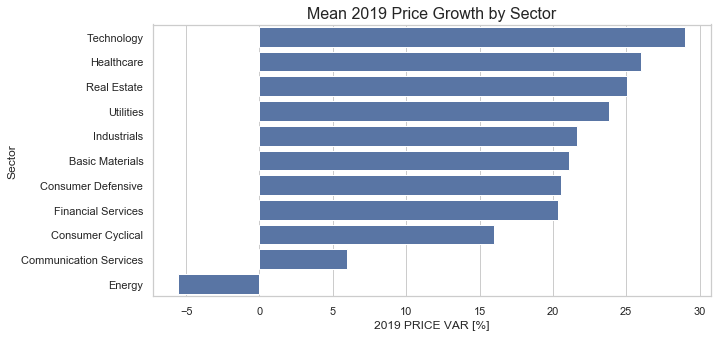

In [14]:
# sort the data by the 2019 price variation: will make it so the bar chart is ranked
sector_means.sort_values(by='2019 PRICE VAR [%]', ascending=False, inplace=True)

# makes the graph the size I want
fig, ax = plt.subplots(figsize=(10,5))

# use seaborn to plot the chart
sns.barplot(x=sector_means['2019 PRICE VAR [%]'], y=sector_means.index,
           orient='h', color='b')
plt.title('Mean 2019 Price Growth by Sector', fontsize=16)

In [15]:
sector_means['2019 PRICE VAR [%]']

Sector
Technology                29.040803
Healthcare                25.980867
Real Estate               25.039212
Utilities                 23.853312
Industrials               21.622172
Basic Materials           21.084933
Consumer Defensive        20.529727
Financial Services        20.326654
Consumer Cyclical         15.957652
Communication Services     5.948902
Energy                    -5.543389
Name: 2019 PRICE VAR [%], dtype: float64

### *This is our answer to the first part: best performing sectors*
We also want to have a look at which companies were the best performing. Let's have a look at the top ten companies and how well they did. A bit of Googling around can give us some more context.

In [16]:
df.sort_values('2019 PRICE VAR [%]', ascending=False)[['Sector', '2019 PRICE VAR [%]']].head(10)

,Sector,2019 PRICE VAR [%]
Company,,
AXSM,Healthcare,3756.716345
ANFI,Consumer Defensive,1285.625036
SSI,Consumer Cyclical,844.186017
ALIM,Healthcare,791.764672
DRIO,Healthcare,758.638738
DRRX,Healthcare,603.703667
ARQL,Healthcare,590.657383
HEBT,Industrials,582.352944
CDLX,Technology,478.821387


Given that healthcare companies feature so prominently in the top 10 % share price growths it will be useful to see how the % share price variation is distributed for technology and healthcare companies.

Text(0.5, 1.0, '2019 % Price Variation Distribution: blue=Tech; orange=Health')

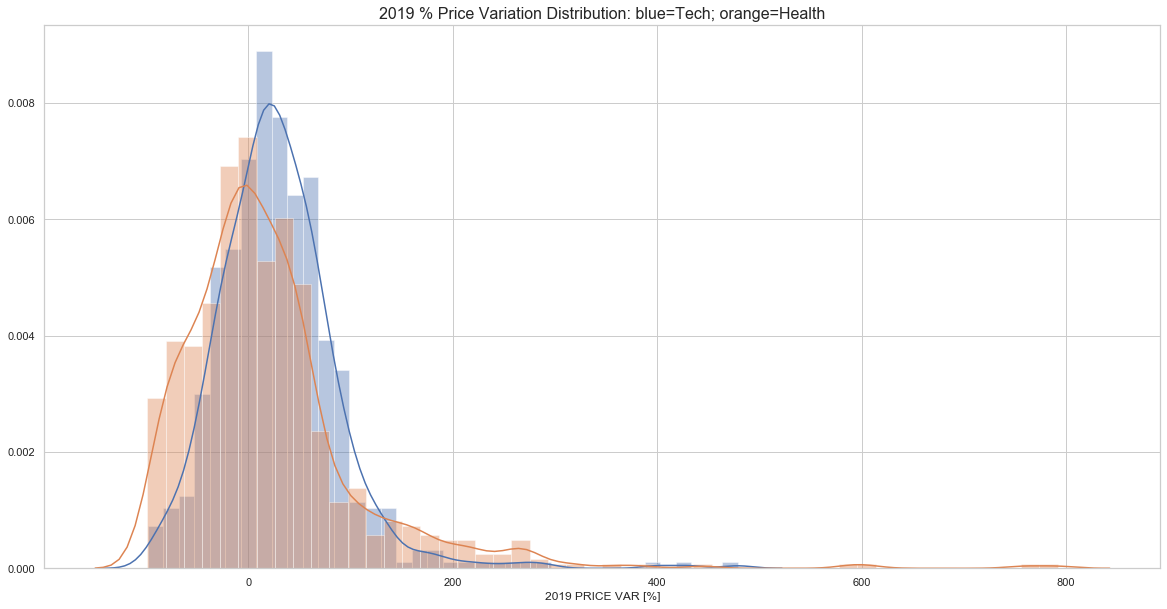

In [17]:
# Makes the figure the size that I want
fig, ax = plt.subplots(figsize=(20,10))

sns.distplot(a=df[df['Sector']=='Technology']['2019 PRICE VAR [%]'])
sns.distplot(a=df[(df['Sector']=='Healthcare') & (df['2019 PRICE VAR [%]']<1000)]['2019 PRICE VAR [%]'])
plt.title('2019 % Price Variation Distribution: blue=Tech; orange=Health', fontsize=16)

We can see that the healthcare companies have the bulk of their percentage growths towards the zero mark yet have their outliers to the far right (the companies that ranked highest in our chart)

---

## Question 2: Technology R&D spending growth and share price growth?
Let's see if there is a link between the amount of money a technology company spends on their R&D department.

In [24]:
RnD_growth = df[df['Sector']=='Technology']

In [25]:
RnD_growth_no_outliers = RnD_growth[(RnD_growth['R&D Expense Growth']<2)]

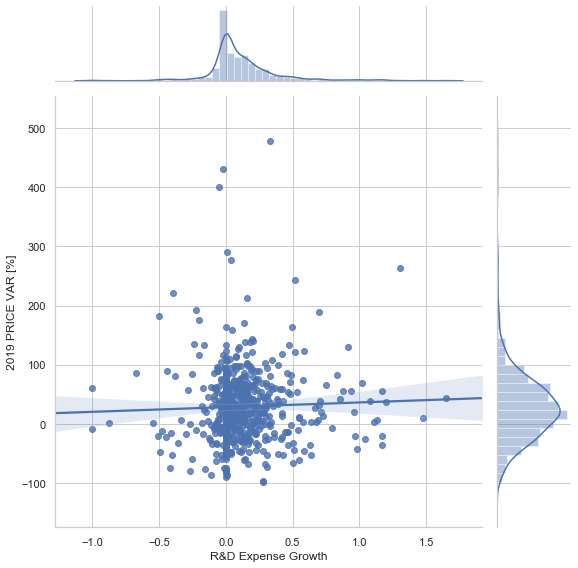

In [26]:
sns.jointplot(x=RnD_growth_no_outliers['R&D Expense Growth'],
              y=RnD_growth_no_outliers['2019 PRICE VAR [%]'],
              height=8,
              kind='reg')

## Question 3: Energy vs. Tech: Where do they differ most?
First make a dataframe of the financial indicator means, groupe dby sector, for only energy and technology. After transposing the dataframe so we have the indicators as the index, we can calculate and sort by the percentage differences.

In [27]:
# create the new dataframe
nrg_vs_tech = sector_means.loc[['Technology','Energy']]

In [28]:
# transpose the dataframe and rename the index
nrg_vs_tech = pd.DataFrame(nrg_vs_tech.transpose())
nrg_vs_tech.drop(labels=['Class','2019 PRICE VAR [%]'], axis=0, inplace=True)
nrg_vs_tech.index.rename('Indicator', inplace=True)

In [29]:
# add a feature for the percentage difference
nrg_vs_tech['pct_diff'] = 100*(nrg_vs_tech['Technology'] - nrg_vs_tech['Energy']) / nrg_vs_tech['Technology']

In [30]:
# filter the data so we only look at those features that differ the most
nrg_vs_tech = nrg_vs_tech[(abs(nrg_vs_tech['pct_diff']) > 5000)].sort_values(by='pct_diff', ascending=False)

In [31]:
# create a visual table with a conditional formatting of aforementioned features
nrg_vs_tech.style.bar(subset=['pct_diff'], align='mid', color=['#d65f5f', '#5fba7d'])

Sector,Technology,Energy,pct_diff
Indicator,,,
EPS Diluted,0.454186,-1462.29,322059
EPS,0.541736,-1462.27,270022
Book Value per Share,11.649,-1536.64,13291.2
Graham Number,15.7002,8466.91,-53828.6
